# House Price Prediction using Neural Network

House price prediction using artificial neural network involves training a network on a dataset of labeled information about houses such as location, number of bedrooms, bathrooms, and square footage. The network will learn to identify patterns and features that are indicative of the prices of different houses. The input layer of the network takes in the house data, while the hidden layers perform calculations and identify patterns. The output layer produces a predicted price for each house. The accuracy of the prediction model can be improved by optimizing the number of hidden layers, number of neurons per layer, activation function, and learning rate. The performance of the network can also be enhanced by using pre-processing techniques such as feature scaling and normalization. In summary, artificial neural networks can be an effective tool for house price prediction when trained and optimized correctly.

**Importing Python Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the dataset**

In [2]:
df = pd.read_csv('/Users/glenquadros/Desktop/Machine Learning/25. Neural Nets and Deep Learning/TensorFlow_FILES/DATA/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Performing Exploratory Data Analysis**

In [4]:
df = df.drop('id', axis=1)

In [5]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.007547,0.086549,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21597.0,0.234292,0.766390,0.0000,0.0000,0.0000,0.000,4.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


<Figure size 1080x432 with 0 Axes>

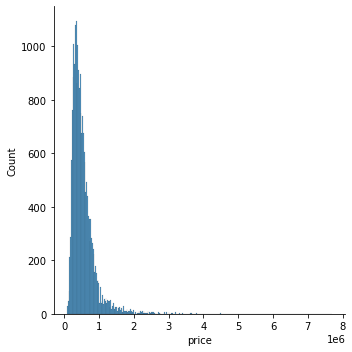

In [7]:
plt.figure(figsize=(15,6))
sns.displot(df['price'])

/Users/glenquadros/opt/anaconda3/envs/New_Environment/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

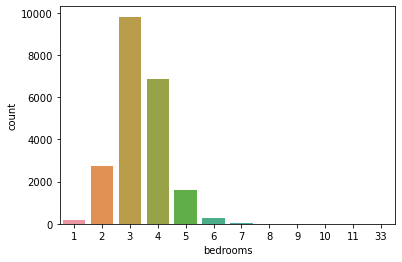

In [8]:
sns.countplot(df['bedrooms'])

In [9]:
df.corr()['price'].sort_values()

zipcode         -0.053402
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

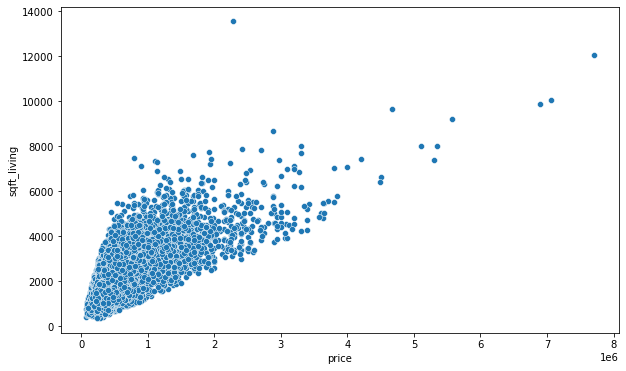

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='sqft_living', data=df);

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

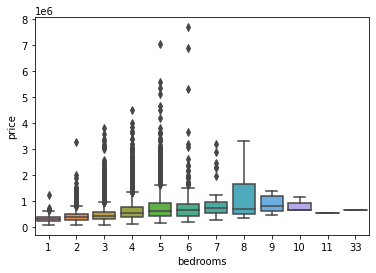

In [11]:
sns.boxplot(x='bedrooms', y='price', data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

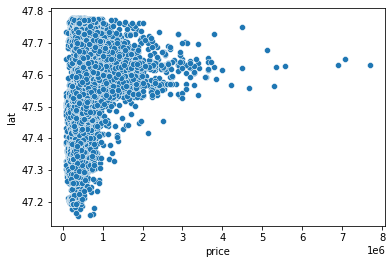

In [12]:
sns.scatterplot(x='price', y='lat', data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

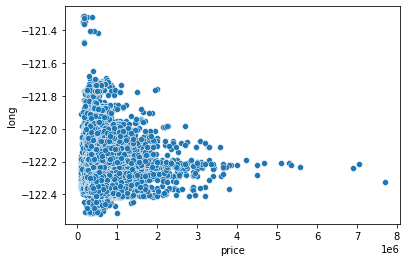

In [13]:
sns.scatterplot(x='price', y='long', data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

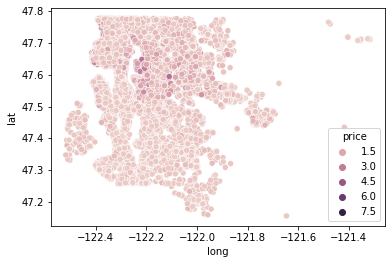

In [14]:
sns.scatterplot(data=df, x='long', y='lat', hue='price')

<Figure size 1080x432 with 0 Axes>

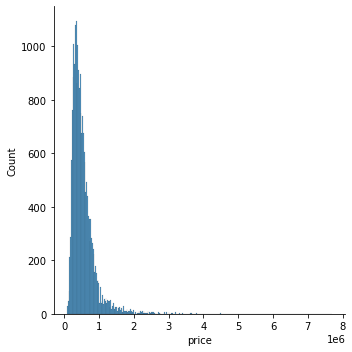

In [15]:
plt.figure(figsize=(15,6))
sns.displot(df['price'])

In [16]:
df.sort_values('price', ascending=False).head(20)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [17]:
len(df)

21597

In [18]:
len(df)*0.01

215.97

In [19]:
non_1_percent_df = df.sort_values('price', ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

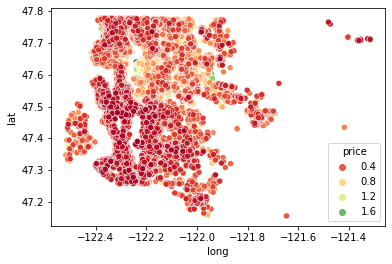

In [20]:
sns.scatterplot(data=non_1_percent_df, x='long', y='lat', hue='price', palette='RdYlGn')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

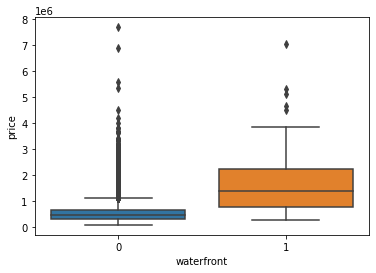

In [21]:
sns.boxplot(x='waterfront', y='price', data=df)

In [22]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [25]:
def year_extraction(date):
    return date.year

In [26]:
df['year'] = df['date'].apply(year_extraction)

In [27]:
def month_extraction(date):
    return date.month

In [28]:
df['month'] = df['date'].apply(month_extraction)

df['year'] = df['date'].apply(lambda date: date.year)

df['month'] = df['date'].apply(lambda date: date.month)

In [29]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

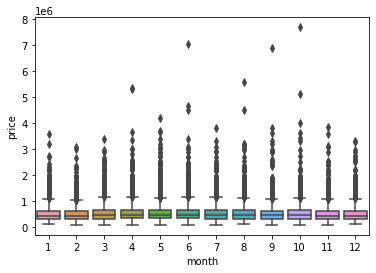

In [30]:
sns.boxplot(x='month', y='price', data=df)

<AxesSubplot:xlabel='month'>

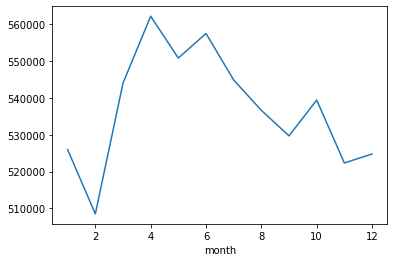

In [32]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

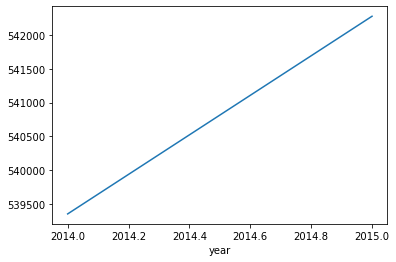

In [33]:
df.groupby('year').mean()['price'].plot()

In [34]:
df = df.drop('date', axis=1)

In [35]:
df = df.drop('zipcode', axis=1)

In [36]:
X = df.drop('price', axis=1).values 
y = df['price'].values

**Splitting the data into training and testing part**

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Normalizing the data**

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
X_train = scaler.fit_transform(X_train)

In [42]:
X_test = scaler.transform(X_test)

In [45]:
X_train.shape

(15117, 19)

**Building neural network**

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [46]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

2023-03-26 19:23:11.613424: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [47]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 430242201600.0000 - val_loss: 418930425856.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429375127552.0000 - val_loss: 415919833088.0000
Epoch 3/400
119/119 [==============================] - 1s 5ms/step - loss: 417334525952.0000 - val_loss: 388445896704.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 357543510016.0000 - val_loss: 289765130240.0000
Epoch 5/400
119/119 [==============================] - 1s 5ms/step - loss: 223779225600.0000 - val_loss: 144457957376.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 116445151232.0000 - val_loss: 96589381632.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 98425831424.0000 - val_loss: 94173265920.0000
Epoch 8/400
119/119 [==============================] - 1s 6ms/step - loss: 96622469120.0000 - val_loss: 92799336448.0000
Epoch 9/400
119/119 [

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 33153443840.0000 - val_loss: 31770656768.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 33136420864.0000 - val_loss: 31726176256.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 33125337088.0000 - val_loss: 31708989440.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 33047234560.0000 - val_loss: 31656204288.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 33037281280.0000 - val_loss: 31653490688.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 33032706048.0000 - val_loss: 31561013248.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 33012035584.0000 - val_loss: 31507079168.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 32913633280.0000 - val_loss: 31476566016.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 30645389312.0000 - val_loss: 28653123584.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 30668304384.0000 - val_loss: 28638351360.0000
Epoch 269/400
119/119 [==============================] - 0s 3ms/step - loss: 30593634304.0000 - val_loss: 28681676800.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30589894656.0000 - val_loss: 28654790656.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 30547552256.0000 - val_loss: 28818108416.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30570942464.0000 - val_loss: 28697395200.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30500671488.0000 - val_loss: 28584122368.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30499528704.0000 - val_loss: 28716969984.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 26888757248.0000 - val_loss: 24918398976.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 26783813632.0000 - val_loss: 25018886144.0000


In [48]:
losses = pd.DataFrame(model.history.history)

In [49]:
losses

,loss,val_loss
0,4.302422e+11,4.189304e+11
1,4.293751e+11,4.159198e+11
2,4.173345e+11,3.884459e+11
3,3.575435e+11,2.897651e+11
4,2.237792e+11,1.444580e+11
...,...,...
395,2.701548e+10,2.512398e+10
396,2.693727e+10,2.501694e+10
397,2.696315e+10,2.492396e+10
398,2.688876e+10,2.491840e+10


<AxesSubplot:>

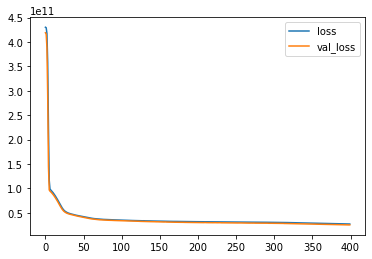

In [50]:
losses.plot()

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [52]:
predictions = model.predict(X_test)

203/203 [==============================] - 1s 2ms/step


In [53]:
mean_absolute_error(y_test, predictions)

95600.50877459491

In [54]:
np.sqrt(mean_squared_error(y_test, predictions))

158173.60731764458

In [56]:
explained_variance_score(y_test, predictions)

0.8119631661146618

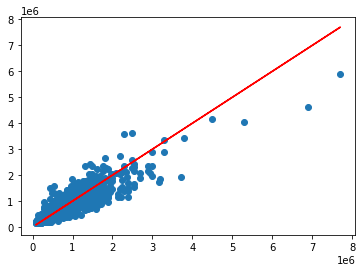

In [58]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [59]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [61]:
single_house = df.drop('price', axis=1).iloc[0]

In [62]:
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [63]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

Since it has single braces i.e, 1-D array, we reshape it (-1,19) where 19 is the number of features, -1 means keep the old shape along the axis

In [65]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [66]:
model.predict(single_house)

1/1 [==============================] - 0s 48ms/step


array([[292206.97]], dtype=float32)

In [67]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
